<h1 style="font-size: 70px;text-align: center; font-family:Copperplate; color: darkblue">Fake News Detection</h1>


<div style = "height: 50px;
  width: 800px;
  background-color: darkblue;">
    <h1 style="padding: 10px;
              color:white;">
        <b>Table of Contents:</b>
    </h1>

</div>

<div>
    <ol>
        <li>
             EDA<br/>
            <ul>
                <li>1.1 Reading data</li>
                <li>1.2 Data Visualization of all News Titles</li>
                <li>1.3 Data Visualization of texts in fake news</li>
                <li>1.4 Data Visualization of texts in real news</li>
            </ul>
        </li>
        <li>
            Bag of Words Model<br/>
        </li><br/>
        <li>
            Naive Bayes Model<br/>
            <ul>
                <li>Predictions</li>
                <li>Evaluation</li>
                <li>Confusion Matrix</li><br/>
            </ul>
        </li>
        <li>
             Random Forest Model<br/>
             <ul>
                <li>Predictions</li>
                <li>Evaluation</li>
                <li>Confusion Matrix</li>
            </ul>
        </li>
        <li>
             Logistic Regression Model<br/>
             <ul>
                <li>Predictions</li>
                <li>Evaluation</li>
                <li>Confusion Matrix</li>
            </ul>
        </li><br/>
        <li>
            Comparative Analysis of Each Model<br/>
        </li>
        <br/>
    </ol>
</div>

<!-- # EDA -->
<div id = "eda" style = "height: 50px;
  width: 800px;
  background-color: #813EEC;">
    <h1 style="padding: 10px;
              color:white;">
        <b>1.EDA</b>
    </h1>

</div>

In [5]:
#importing Libraries
import numpy as np
import pandas as pd
from matplotlib.pylab import plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk

<div id = "rd"style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       1.1 Reading Data
    </h3>

</div>

In [6]:
df = pd.read_csv('WELFake_Dataset.csv')
df.head(10)

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
6,6,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1
7,7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1
8,8,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1
9,9,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ...",1


In [3]:
df.describe()

,Unnamed: 0,label
count,72134.000000,72134.000000
mean,36066.500000,0.514404
std,20823.436496,0.499796
min,0.000000,0.000000
25%,18033.250000,0.000000
50%,36066.500000,1.000000
75%,54099.750000,1.000000
max,72133.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [7]:
y = df.label
print(f'Ratio of real and fake news:')
y.value_counts(normalize=True).rename({1: 'real', 0: 'fake'})

Ratio of real and fake news:


label
real    0.514404
fake    0.485596
Name: proportion, dtype: float64

In [8]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

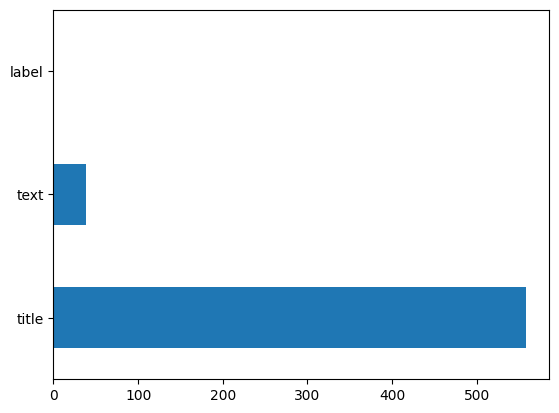

In [9]:
df.isnull().sum().plot(kind="barh")
plt.show()

<div style = "height: 210px;
  width: 800px;
  border:5px inset red;
  background-color: #e2e1e9;">
    <h3 style="
              color:black;
               ">
        <b>Observations:</b> 
        
 <p>
     <ol>
         <li>There are a total of 4 columns and 72134 rows in the data</li>
         <li>Label is the target variable</li>
         <li>Percentage of Real and fake News articles:<ul><li>real : 51%</li><li>fake :49%</li></ul></li>
         <li>Missing values are present in the dataset</li>
    </ol>
 </p>
    </h3>

</div>

In [10]:
df.isnull().sum()

title    558
text      39
label      0
dtype: int64

In [11]:
df = df.fillna('')

In [12]:
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [13]:
df.nunique()

title    62348
text     62719
label        2
dtype: int64

In [14]:
df["title_text"] = df["title"] + df["text"]
df["body_len"] = df["title_text"].apply(lambda x: len(x) - x.count(" "))
df.head()

,title,text,label,title_text,body_len
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,4222
1,,Did they post their votes for Hillary already?,1,Did they post their votes for Hillary already?,39
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,299
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri...",6811
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN 2: Russia unvelis an image of its terrif...,1668


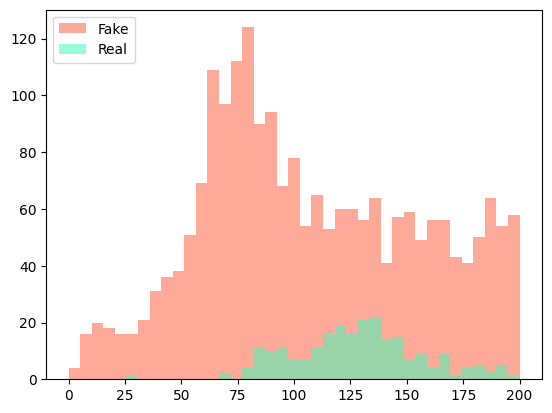

In [15]:
bins = np.linspace(0, 200, 40)

plt.hist(df[df["label"]== 1]["body_len"], bins, alpha=0.5, label="Fake", color="#FF5733")
plt.hist(df[df["label"]== 0]["body_len"], bins, alpha=0.5, label="Real", color="#33FFB8")
plt.legend(loc="upper left")
plt.show()

<div style = "height: 150px;
  width: 800px;
  border:5px inset red;
  background-color: #e2e1e9;">
    <h3 style="padding: 10px;
              color:black;
               ">
        <b>Insights :</b> 
        <br></br>
       
 <i>Fake news seem to be quite a bit longer than real news.</i>
    </h3>

</div>

Text(0.5, 1.0, 'Distribution of Fake/Real News')

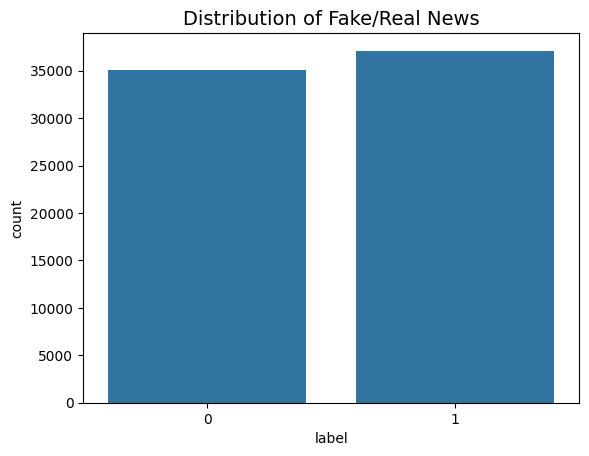

In [9]:
class_names = ['fake', 'real'] 
label_count = df.label.value_counts()
sns.barplot(x=label_count.index, y=label_count)
plt.title('Distribution of Fake/Real News',fontsize =14)

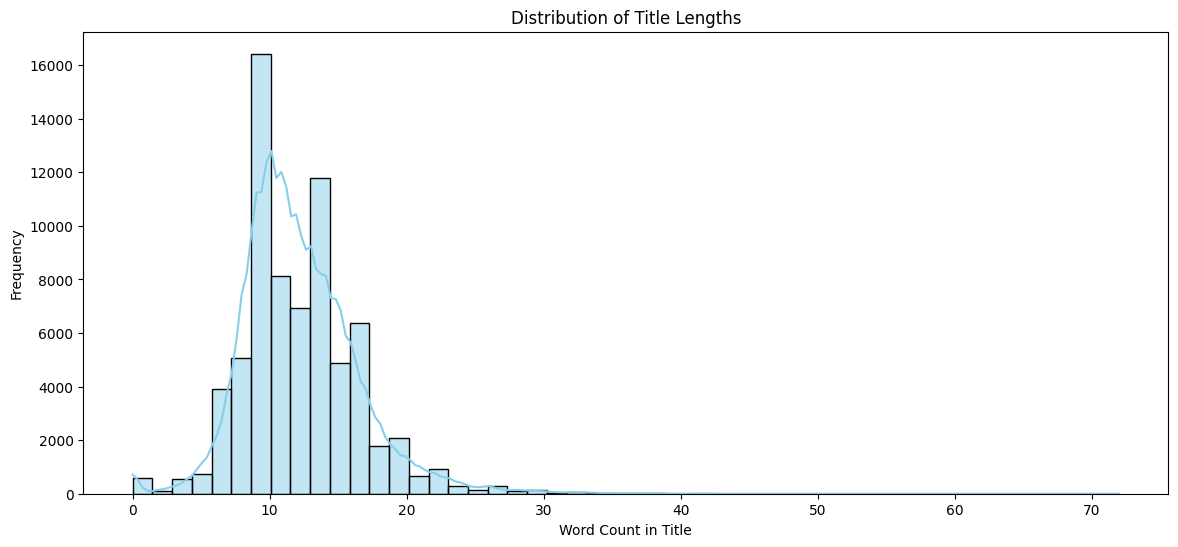

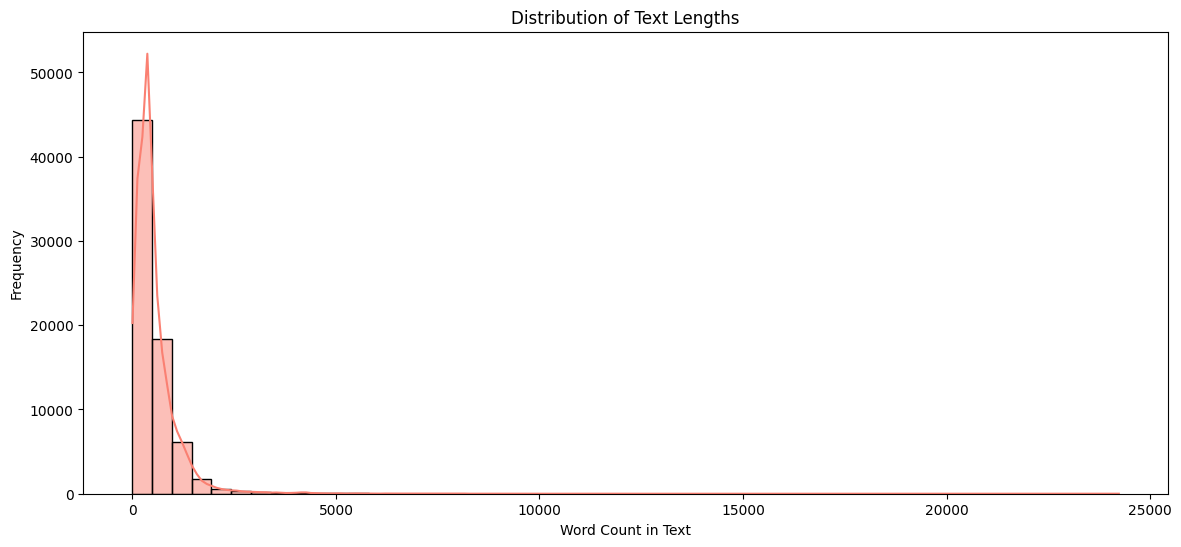

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming your DataFrame is named df
# Add columns for word counts in `title` and `text`
df['title_length'] = df['title'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)

# Plot title length distribution
plt.figure(figsize=(14, 6))
sns.histplot(df['title_length'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Title Lengths')
plt.xlabel('Word Count in Title')
plt.ylabel('Frequency')
plt.show()

# Plot text length distribution
plt.figure(figsize=(14, 6))
sns.histplot(df['text_length'], bins=50, kde=True, color='salmon')
plt.title('Distribution of Text Lengths')
plt.xlabel('Word Count in Text')
plt.ylabel('Frequency')
plt.show()



In [17]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size=0.33, random_state=53)

<div id = "nt"style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       1.2 Data Visualization of all News Titles
    </h3>

</div>

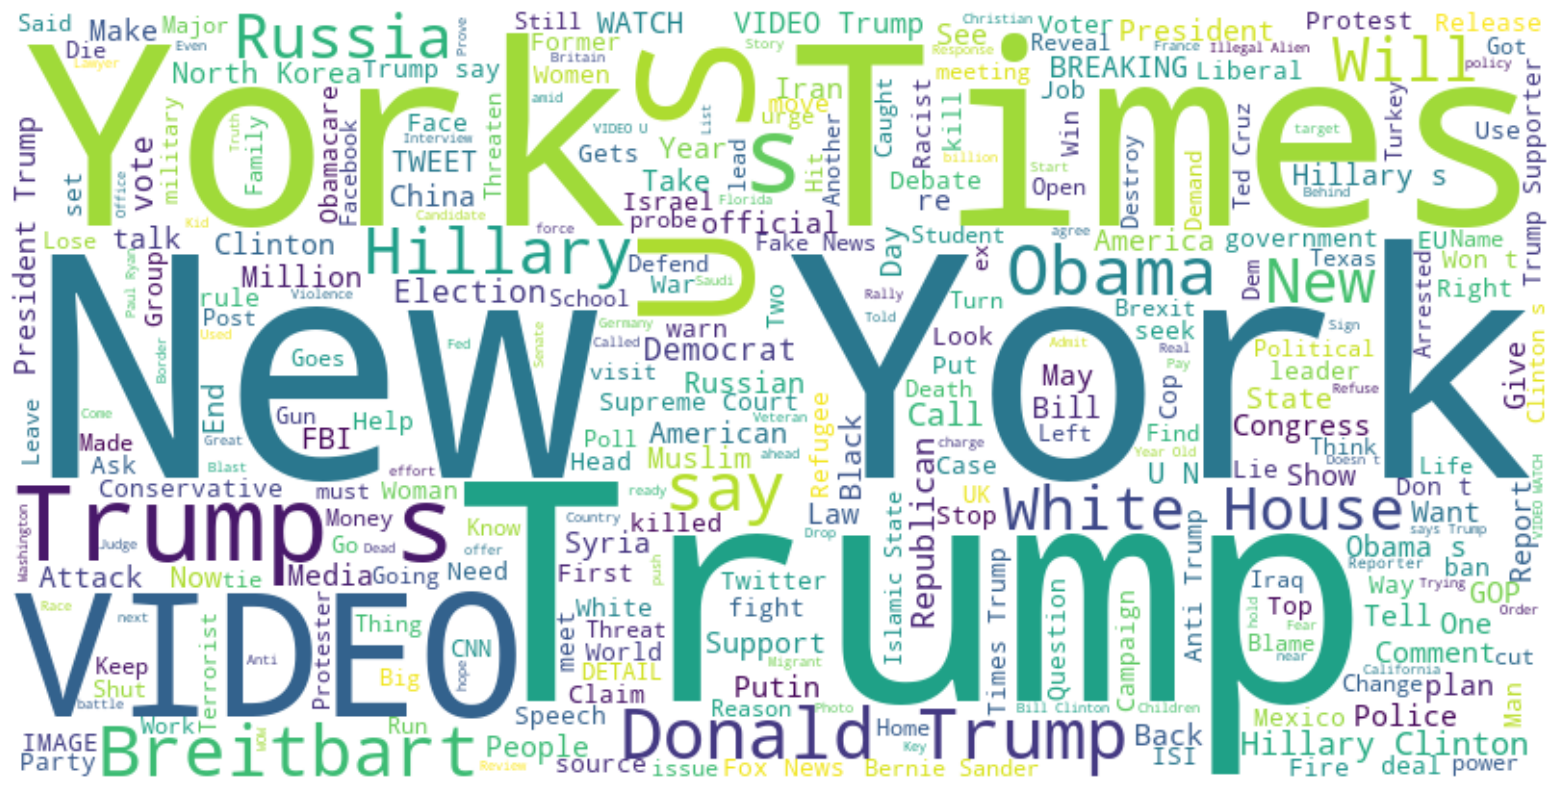

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all titles into a single string
titles = ' '.join(title for title in df['title'])

# Generate the word cloud
wordcloud = WordCloud(
    background_color='white', 
    max_words=300,
    width=800, 
    height=400,
).generate(titles)

# Display the word cloud
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


<div style = "height: 110px;
  width: 800px;
  border:5px inset red;
  background-color: #e2e1e9;">
    <h3 style="
              color:black;
               ">
        <b>Quick Insights:</b> 
        
 <p>
     <ul>
         <li>many of available news articles are about elections and presidents of USA </li>
    </ul>
 </p>
    </h3>

</div>

<div id = "ft"style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       1.3 Data Visualization of texts in fake news
    </h3>

</div>

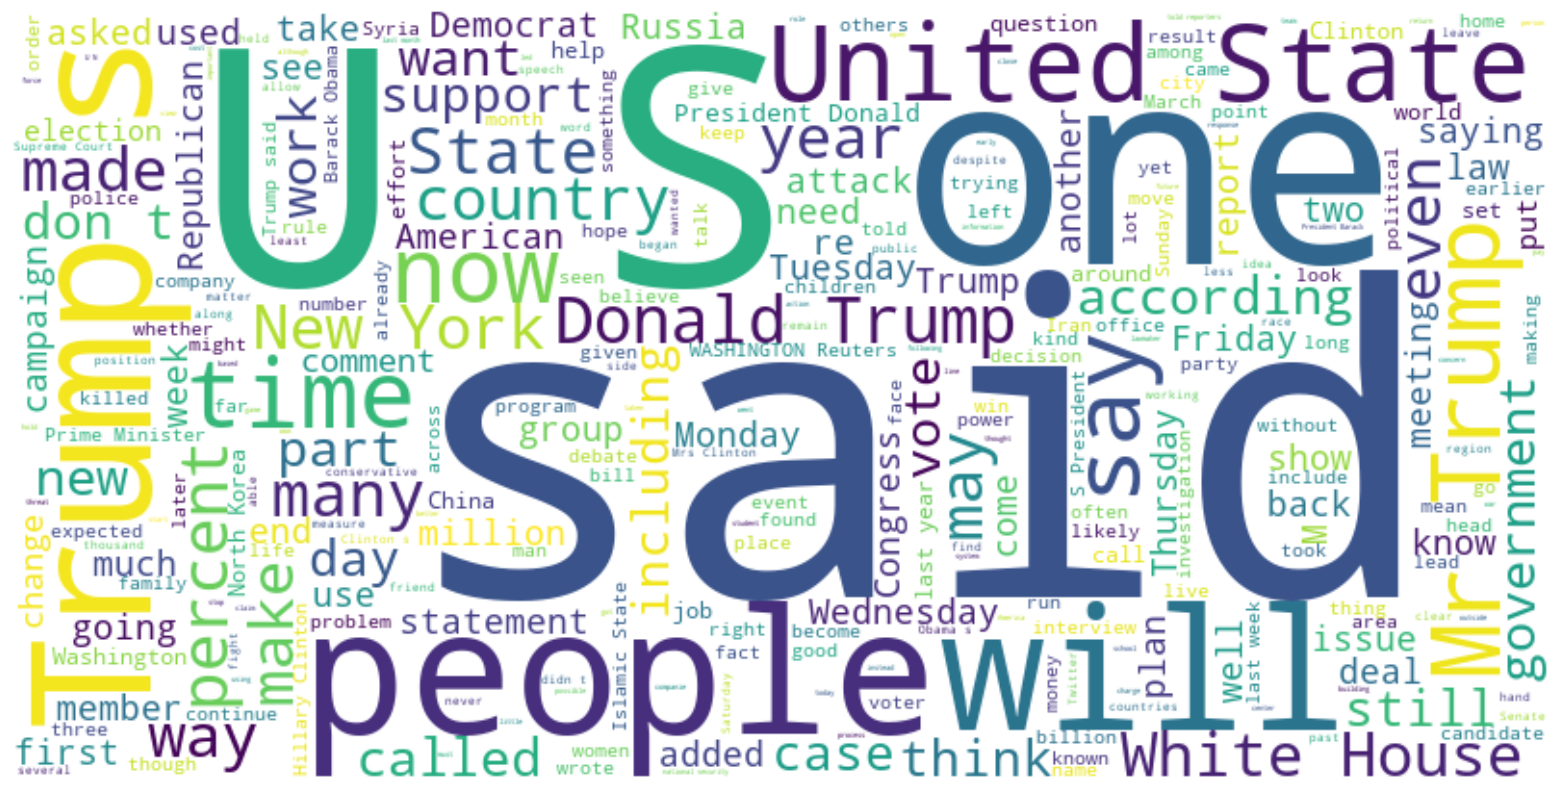

In [21]:
fake_news = X_train[y_train == 0]
real_news = X_train[y_train == 1]
fake_texts = ' '.join(text for text in fake_news)
wordcloud = WordCloud(
    background_color='white', 
    max_words=300,
    width=800, 
    height=400,
).generate(fake_texts)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<div id = "rt"style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       1.4 Data Visualization of texts in Real news
    </h3>

</div>

<function matplotlib.pyplot.show(close=None, block=None)>

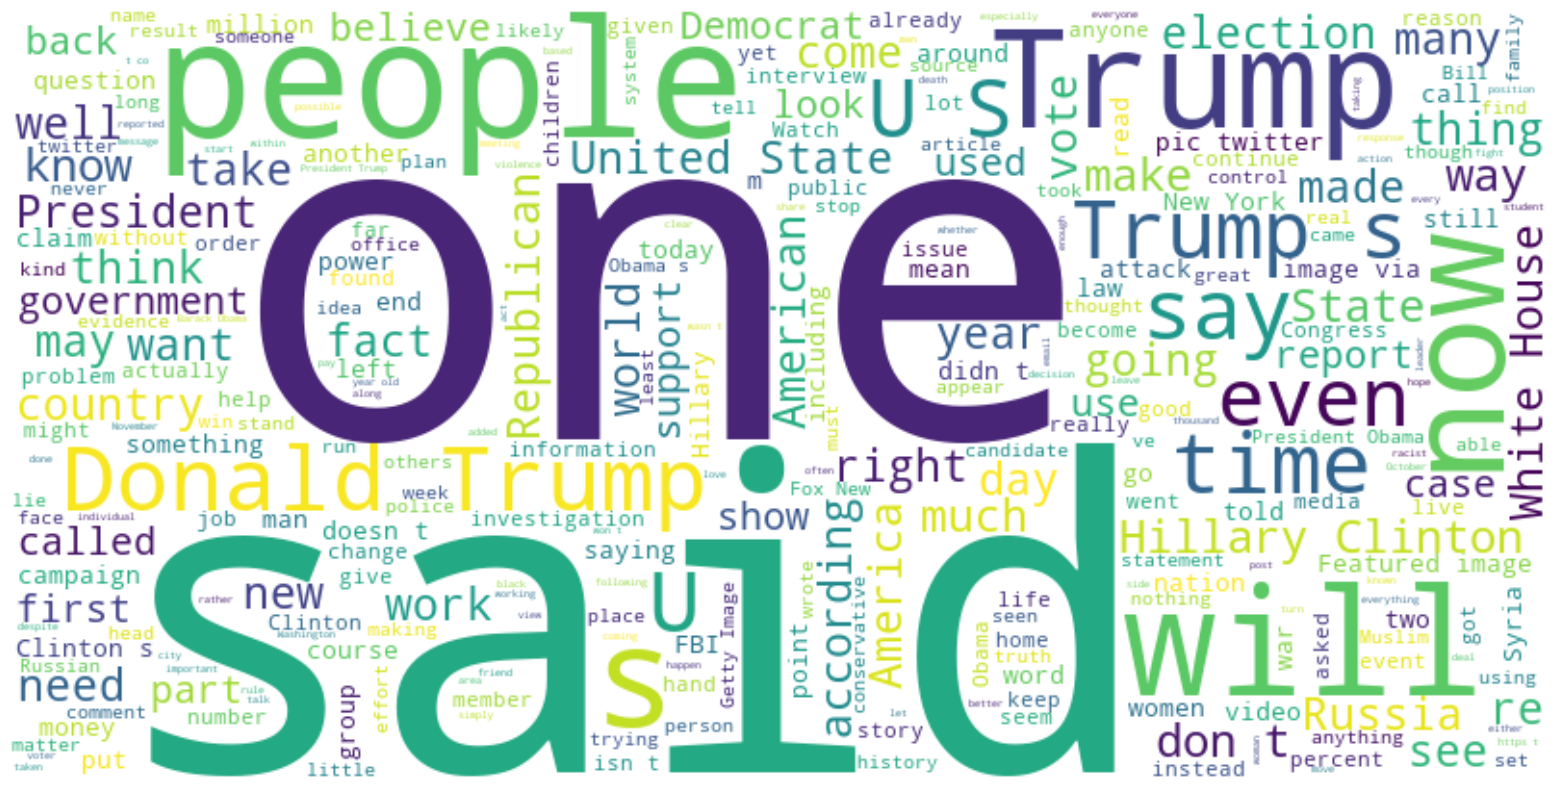

In [22]:
real_texts = ' '.join(text for text in real_news)
wordcloud = WordCloud(
    background_color='white', 
    max_words=300,
    width=800, 
    height=400,
).generate(real_texts)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show

<!-- # EDA -->
<div id = "bm"style = "height: 50px;
  width: 800px;
  background-color: #813EEC;">
    <h1 style="padding: 10px;
              color:white;">
        <b>2.Bag of Words Model</b>
    </h1>

</div>

In [18]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)
feature_names = count_vectorizer.get_feature_names_out()

<!-- # EDA -->
<div id = "nb"style = "height: 50px;
  width: 800px;
  background-color: #813EEC;">
    <h1 style="padding: 10px;
              color:white;">
        <b>3.Training Naive Bayes Model</b>
    </h1>

</div>

In [19]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, y_train)


MultinomialNB()

<div id = "p1"style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       3.1 Predictions on NB model 
    </h3>

</div>

In [20]:
pred = nb_classifier.predict(count_test)

<div id = "e1"style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       3.2 Evaluation of NB predictions
    </h3>

</div>

In [21]:
print("Naive Bayes Report:")
print(classification_report(y_test, pred))

Naive Bayes Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     11640
           1       0.91      0.87      0.89     12165

    accuracy                           0.89     23805
   macro avg       0.89      0.89      0.89     23805
weighted avg       0.89      0.89      0.89     23805



<div id = "cm1"style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       3.3 Confusion Matrix
    </h3>

</div>

Text(70.72222222222221, 0.5, 'Real Labels')

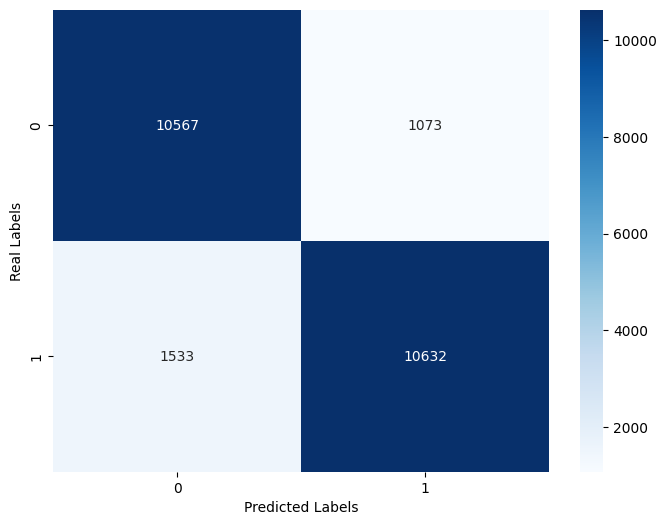

In [18]:
plt.figure(figsize = (8,6))

sns.heatmap(confusion_matrix(y_test,pred), annot=True, 
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

<!-- # EDA -->
<div id = "rm" style = "height: 50px;
  width: 800px;
  background-color: #813EEC;">
    <h1 style="padding: 10px;
              color:white;">
        <b>4.Training Random Forest Model</b>
    </h1>

</div>

In [22]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=300)
model.fit(count_train, y_train)

RandomForestClassifier(n_estimators=300)

<div id = "p2"style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       4.1 Predictions on Random Forest Classifier
    </h3>

</div>

In [23]:
pred2 = model.predict(count_test)

<div id = "e2"style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       4.2 Evaluation of RF Classifier Predictions
    </h3>

</div>

In [24]:
print("Random Forest Report:")
print(classification_report(y_test, pred2))

Random Forest Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93     11640
           1       0.93      0.94      0.94     12165

    accuracy                           0.93     23805
   macro avg       0.93      0.93      0.93     23805
weighted avg       0.93      0.93      0.93     23805



<div id = "cm2" style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       4.3 Confusion Matrix
    </h3>

</div>

Text(70.72222222222221, 0.5, 'Real Labels')

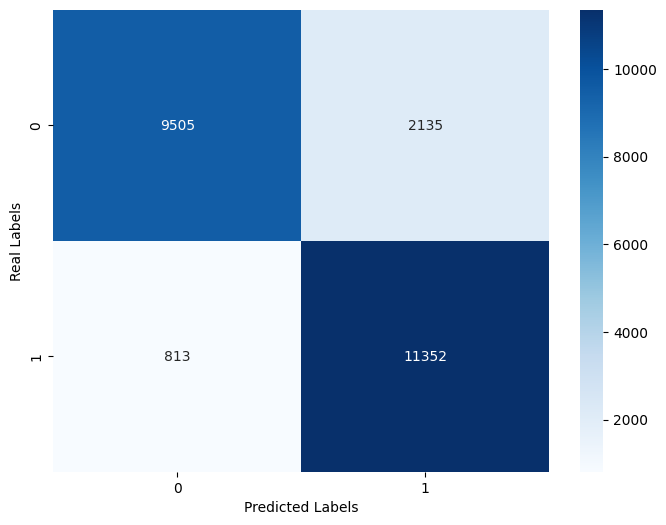

In [27]:
plt.figure(figsize = (8,6))

sns.heatmap(confusion_matrix(y_test,pred2), annot=True, 
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

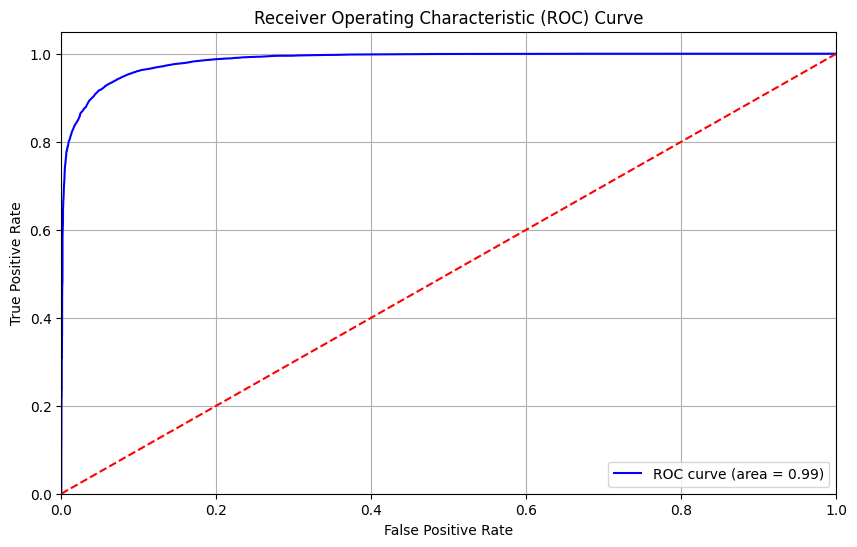

In [37]:
from sklearn.metrics import roc_curve, auc
y_prob = model.predict_proba(count_test)[:, 1]

# Step 5: Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Step 6: Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

<!-- # EDA -->
<div id = "rm" style = "height: 50px;
  width: 800px;
  background-color: #813EEC;">
    <h1 style="padding: 10px;
              color:white;">
        <b>5.Training Logistic Regression Model</b>
    </h1>

</div>

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model_logreg = LogisticRegression(max_iter=200, solver='saga')  
model_logreg.fit(count_train, y_train)

C:\Users\nagav\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=200, solver='saga')

<div id = "p2"style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       5.1 Predictions on Logistic Regression
    </h3>

</div>

In [26]:
pred_logreg = model_logreg.predict(count_test)

<div id = "e2"style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       5.2 Evaluation of Logistic Regression Predictions
    </h3>

</div>

In [27]:


print("Logistic Regression Report")
print(classification_report(y_test, pred_logreg))


Logistic Regression Report
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     11640
           1       0.94      0.93      0.94     12165

    accuracy                           0.94     23805
   macro avg       0.94      0.94      0.94     23805
weighted avg       0.94      0.94      0.94     23805



<div id = "e2"style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       5.3 Confusion Matrix
    </h3>

</div>

Text(70.72222222222221, 0.5, 'Real Labels')

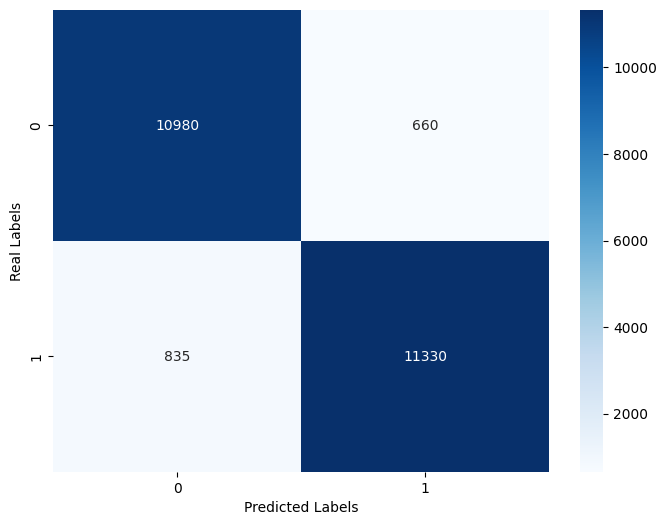

In [47]:
plt.figure(figsize = (8,6))

sns.heatmap(confusion_matrix(y_test,pred_logreg), annot=True, 
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Step 1: Define and train the SVM model
svm_model = LinearSVC(max_iter=1000)  # Adjust max_iter if needed
svm_model.fit(count_train, y_train)

In [ ]:
y_svm = svm_model.predict(count_test)

In [ ]:
print("SVM Report")
print(classification_report(y_test, y_svm))

<div id = "e2"style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       6. Comparative Analysis of each model
    </h3>

</div>

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

def add_metrics(name, y_test, y_pred):
    metrics['Model'].append(name)
    metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['Precision'].append(precision_score(y_test, y_pred, average='weighted'))
    metrics['Recall'].append(recall_score(y_test, y_pred, average='weighted'))
    metrics['F1 Score'].append(f1_score(y_test, y_pred, average='weighted'))

add_metrics("Logistic Regression", y_test, pred_logreg)

add_metrics("Random Forest", y_test, pred2)
add_metrics("Naive Bayes", y_test, pred)


<Figure size 1200x800 with 0 Axes>

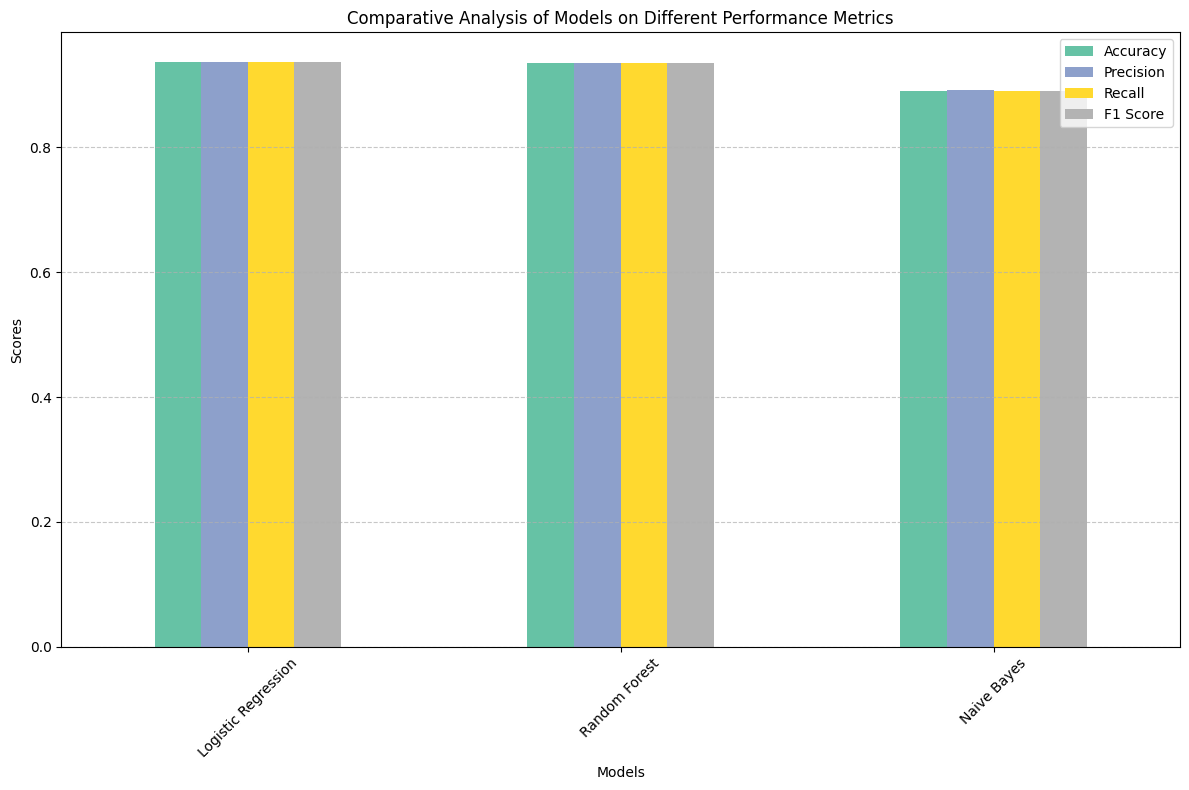

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert metrics dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics)

# Plotting the comparative analysis
plt.figure(figsize=(10, 8))
metrics_df.set_index('Model').plot(kind='bar', stacked=False, colormap="Set2", figsize=(10, 8))
plt.title("Comparative Analysis of Models on Different Performance Metrics")
plt.ylabel("Scores")
plt.xlabel("Models")
plt.legend(loc="upper right")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [17]:
import ipywidgets as widgets
from IPython.display import display
import numpy as np

news_input = widgets.Textarea(
    value='',
    placeholder='Enter the news article text here...',
    description='News:',
    layout=widgets.Layout(width='90%', height='100px')
)

predict_button = widgets.Button(
    description="Check if Fake",
    button_style='primary',
    layout=widgets.Layout(width='20%')
)

output = widgets.Output()

def check_fake_news(button):
    with output:
        output.clear_output()
    
        news_text = news_input.value
        
        news_vector = count_vectorizer.transform([news_text]) 
 
        prediction = model_logreg.predict(news_vector)

        if prediction == 0:
            print("The news is fake.")
        else:
            print("The news is real.")

predict_button.on_click(check_fake_news)

display(news_input, predict_button, output)


Textarea(value='', description='News:', layout=Layout(height='100px', width='90%'), placeholder='Enter the new…

Button(button_style='primary', description='Check if Fake', layout=Layout(width='20%'), style=ButtonStyle())

Output()

<div style = "height: 100px;
  width: 800px;
  background-color: #e2e1e9;">
    <p style="padding: 10px;
              color:black;
              text-align:center;">
        <b>Thank you for reading. <br></br> Please do upvote if you liked the notebook If you have any suggestions please let me know<b>
    </p>

</div>